In [3]:
import ROOT
import uproot 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
BASE_DIR = "/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/preunfolded_2017/Nominal/emu"

In [8]:
c_kk_preunfolded = uproot.open(BASE_DIR + "/c_kk.root")

In [9]:
c_kk_preunfolded.keys()

['c_kkData;1',
 'c_kkGen;1',
 'c_kkVisGen;1',
 'c_kkReco;1',
 'c_kkRecoBg;1',
 'c_kkRespMat;1',
 'c_kkRespMatSys_JER_UP;1',
 'c_kkRespMatSys_JER_DOWN;1',
 'c_kkRespMatSys_JES_UP;1',
 'c_kkRespMatSys_JES_DOWN;1',
 'c_kkRespMatSys_UNCLUSTERED_UP;1',
 'c_kkRespMatSys_UNCLUSTERED_DOWN;1',
 'c_kkRespMatSys_PU_UP;1',
 'c_kkRespMatSys_PU_DOWN;1',
 'c_kkRespMatSys_TRIG_UP;1',
 'c_kkRespMatSys_TRIG_DOWN;1',
 'c_kkRespMatSys_BTAG_UP;1',
 'c_kkRespMatSys_BTAG_DOWN;1',
 'c_kkRespMatSys_BTAG_LJET_UP;1',
 'c_kkRespMatSys_BTAG_LJET_DOWN;1',
 'c_kkRespMatSys_L1PREFIRING_UP;1',
 'c_kkRespMatSys_L1PREFIRING_DOWN;1',
 'c_kkRespMatSys_ELE_ID_UP;1',
 'c_kkRespMatSys_ELE_ID_DOWN;1',
 'c_kkRespMatSys_ELE_RECO_UP;1',
 'c_kkRespMatSys_ELE_RECO_DOWN;1',
 'c_kkRespMatSys_ELE_SCALESMEARING_UP;1',
 'c_kkRespMatSys_ELE_SCALESMEARING_DOWN;1',
 'c_kkRespMatSys_MUON_ID_UP;1',
 'c_kkRespMatSys_MUON_ID_DOWN;1',
 'c_kkRespMatSys_MUON_ISO_UP;1',
 'c_kkRespMatSys_MUON_ISO_DOWN;1',
 'c_kkRespMatSys_MUON_SCALE_UP;1',
 'c_kkR

### Project out the axes

In [10]:
c_kk_preunfolded["c_kkRespMat"].to_hist()

Hist(
  Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'),
  Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'),
  storage=Weight()) # Sum: WeightedSum(value=175195, variance=2736.7) (WeightedSum(value=1.10539e+06, variance=19052) with flow)

In [11]:
c_kk_preunfolded["c_kkRespMat"].to_hist().project('xaxis')

Hist(Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'), storage=Weight()) # Sum: WeightedSum(value=1.10539e+06, variance=19052)

In [12]:
c_kk_preunfolded["c_kkRespMat"].to_hist().project('yaxis')

Hist(Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=175195, variance=2736.7) (WeightedSum(value=1.10539e+06, variance=19052) with flow)

## Compare bin by bin contents

### Gen 

In [13]:
gen_from_projection = b1k_preunfolded["c_kkRespMat"].to_hist().project('xaxis').to_numpy()[0]
gen_from_projection

array([  1759.46343824,   5636.47637838,  10029.18188834,  15001.6699676 ,
        20714.64708354,  27326.0493605 ,  35179.17766066,  44633.91541113,
        56645.13966996,  72962.23914278,  98029.04347346, 164691.12641228,
       164868.34717039,  98029.04347346,  72962.23914278,  56645.13966996,
        44633.91541113,  35179.12452579,  27326.10249537,  20714.64708354,
        15001.6699676 ,  10029.18188834,   5636.47637838,   1759.46343824])

In [14]:
gen_from_histogram = b1k_preunfolded["c_kkGen"].to_numpy()[0]
gen_from_histogram

array([  1978.42423284,   6158.42063308,  10771.88641687,  15878.04991869,
        21693.76684146,  28270.64588204,  35983.66811559,  45266.09569079,
        56891.97989292,  72618.69139288,  96668.89214268, 160550.32358168,
       160550.32358168,  96668.89214268,  72618.67392881,  56891.997357  ,
        45266.09569079,  35983.64909959,  28270.66489804,  21693.76684146,
        15878.04991869,  10771.88641687,   6158.42063308,   1978.42423284])

In [15]:
gen_from_projection == gen_from_histogram

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [16]:
delta_gen = np.divide((gen_from_projection - gen_from_histogram), gen_from_histogram)
delta_gen = abs(delta_gen) * 100
delta_gen 

array([11.06743392,  8.475294  ,  6.89484181,  5.51944323,  4.51336905,
        3.34126261,  2.23570997,  1.39658672,  0.43387526,  0.47308447,
        1.40702071,  2.57913079,  2.6895141 ,  1.40702071,  0.47310863,
        0.43390582,  1.39658672,  2.23580597,  3.34113968,  4.51336905,
        5.51944323,  6.89484181,  8.475294  , 11.06743392])

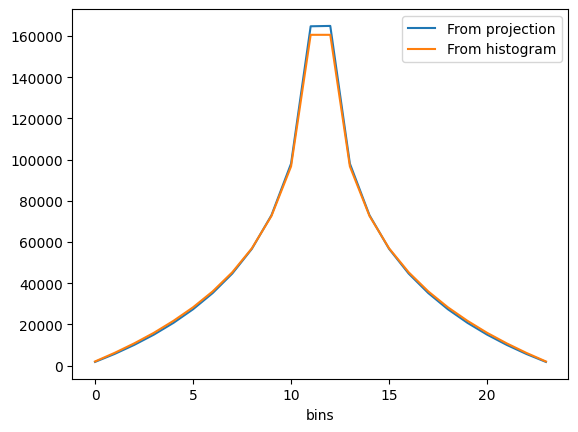

In [34]:
plt.plot(gen_from_projection, label="From projection")
plt.plot(gen_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.88, 1.04)

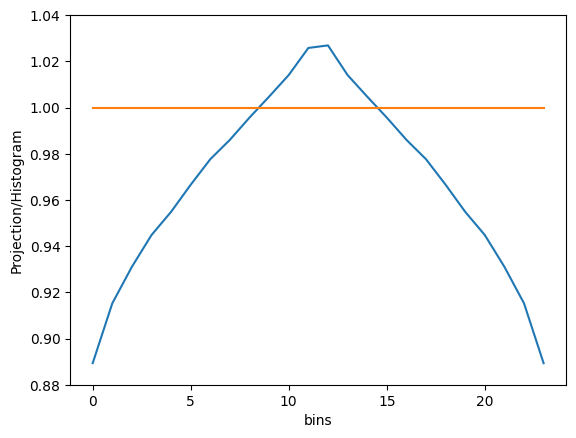

In [43]:
plt.plot(np.divide(gen_from_projection, gen_from_histogram))
plt.plot(np.ones(len(gen_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.88,1.04)

In [18]:
sum(delta_gen)/ len(delta_gen)

4.032688173523867

### Reco

In [19]:
reco_from_projection = b1k_preunfolded["c_kkRespMat"].to_hist().project('yaxis').to_numpy()[0]
reco_from_projection

array([   35.57559594,   165.80233501,   325.56407233,   499.69128808,
         673.5030222 ,   867.44656789,  1078.5762633 ,  1295.22164933,
        1526.13370012,  1763.93525952,  2048.5026042 ,  2334.13578395,
        2659.37210183,  2988.79051524,  3354.78333953,  3774.28700138,
        4239.92398178,  4791.1873584 ,  5434.80076999,  6186.81780678,
        7148.66324198,  8439.01584301, 10421.41856573, 15544.25285845,
       15544.25285845, 10421.41856573,  8439.01584301,  7148.66324198,
        6186.81780678,  5434.80076999,  4791.1873584 ,  4239.92398178,
        3774.28700138,  3354.78333953,  2988.79051524,  2659.37210183,
        2334.13578395,  2048.5026042 ,  1763.91858748,  1526.15037215,
        1295.22164933,  1078.5762633 ,   867.44656789,   673.5030222 ,
         499.69128808,   325.56407233,   165.80233501,    35.57559594])

In [21]:
reco_from_histogram = b1k_preunfolded["c_kkReco"].to_numpy()[0]
reco_from_histogram

array([   35.59084846,   165.86637287,   325.91624966,   500.15146262,
         674.13884906,   868.09168483,  1079.78421886,  1296.50099411,
        1527.79852927,  1765.38414642,  2049.94483516,  2336.51266106,
        2661.76721664,  2991.26755921,  3357.439014  ,  3777.01106441,
        4243.20193796,  4794.42959652,  5438.40224039,  6191.16826229,
        7153.11357708,  8444.43190923, 10428.28906467, 15553.75946923,
       15553.75946923, 10428.28906467,  8444.43190923,  7153.11357708,
        6191.16826229,  5438.40224039,  4794.42959652,  4243.20193796,
        3777.01106441,  3357.439014  ,  2991.26755921,  2661.76721664,
        2336.51266106,  2049.94483516,  1765.36747438,  1527.81520131,
        1296.50099411,  1079.78421886,   868.09168483,   674.13884906,
         500.15146262,   325.91624966,   165.86637287,    35.59084846])

In [22]:
reco_from_projection == reco_from_histogram

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
delta_reco = np.divide((reco_from_projection - reco_from_histogram), reco_from_histogram)
delta_reco = abs(delta_reco) * 100
delta_reco

array([0.04285518, 0.0386081 , 0.10805762, 0.09200704, 0.0943169 ,
       0.07431438, 0.11187009, 0.09867673, 0.10896916, 0.08207205,
       0.07035462, 0.10172755, 0.08998213, 0.08280917, 0.07909822,
       0.07212219, 0.07725195, 0.06762511, 0.06622295, 0.07026873,
       0.06221536, 0.06413772, 0.06588328, 0.06112098, 0.06112098,
       0.06588328, 0.06413772, 0.06221536, 0.07026873, 0.06622295,
       0.06762511, 0.07725195, 0.07212219, 0.07909822, 0.08280917,
       0.08998213, 0.10172755, 0.07035462, 0.08207282, 0.10896797,
       0.09867673, 0.11187009, 0.07431438, 0.0943169 , 0.09200704,
       0.10805762, 0.0386081 , 0.04285518])

In [24]:
sum(delta_reco)/ len(delta_reco)

0.07844029138383625

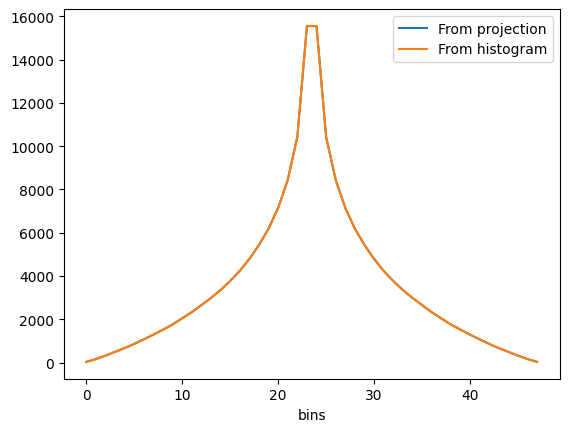

In [25]:
plt.plot(reco_from_projection, label="From projection")
plt.plot(reco_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.99, 1.01)

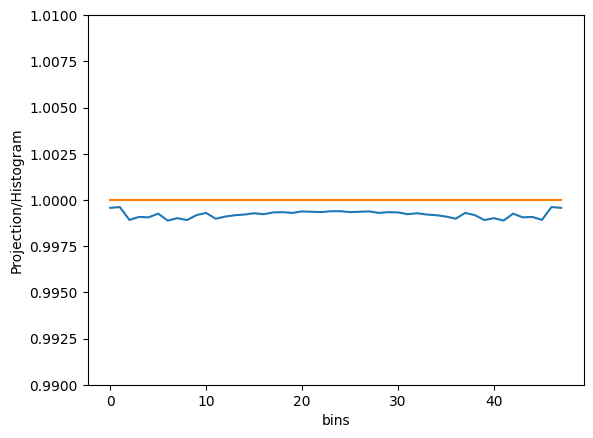

In [36]:
plt.plot(np.divide(reco_from_projection, reco_from_histogram))
plt.plot(np.ones(len(reco_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.99,1.01)

In [26]:
RespMat = c_kk_preunfolded["c_kkRespMat"].to_hist()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(
/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


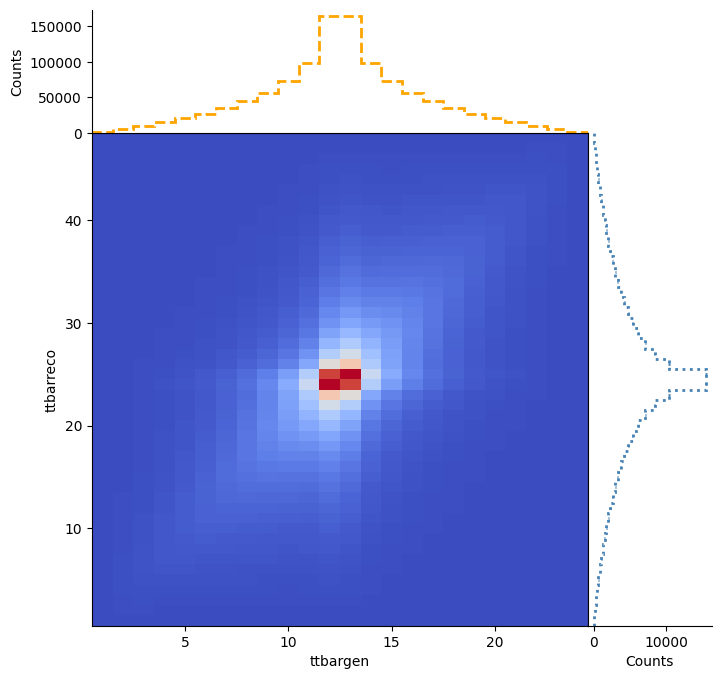

In [27]:
# plot2d_full
plt.figure(figsize=(8, 8))

RespMat.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.show()
